In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [2]:
design_mat = pd.read_csv('../Data/design_matrix.csv',index_col=0)

In [3]:
design_mat.head()

,Register,Mode,Tempo,Soundlevel,Articulation,Timbre,Melody
Nro,,,,,,,
1,4,1,4,4,2,2,4
2,5,1,4,1,1,2,2
3,2,2,5,1,1,2,1
4,1,1,5,4,4,1,2
5,3,2,1,3,2,2,1


In [4]:
design_mat.describe()

,Register,Mode,Tempo,Soundlevel,Articulation,Timbre,Melody
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.380000,1.530000,2.905000,2.870000,2.440000,2.000000,2.425000
std,1.697056,0.500352,1.433965,1.379352,1.101119,0.814442,1.095617
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000
75%,5.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,6.000000,2.000000,5.000000,5.000000,4.000000,3.000000,4.000000


In [5]:
emotion_rating = pd.read_csv('../Data/mean_emotion_ratings.csv',index_col=0)

In [6]:
emotion_rating.head()

,Scary,Happy,Sad,Peaceful
Nro,,,,
1,1.2889,4.4667,1.7111,3.1333
2,1.0667,5.4444,1.4889,4.4889
3,2.0222,1.4889,3.7778,2.7111
4,2.2889,4.1111,1.2667,1.4889
5,1.4000,1.4667,5.0444,3.8444


In [7]:
a = []

for i in emotion_rating.values:
    if max(i) == i[0]:
        a.append(2)
    elif max(i) == i[1]:
        a.append(3)
    elif max(i) == i[2]:
        a.append(1)
    elif max(i) == i[3]:
        a.append(4)
    

In [8]:
emotion_rating["projected emotion"] = a

In [9]:
count = 0
for i in range(len(design_mat)):
    if design_mat.iloc[i,6] == emotion_rating.iloc[i,4]:
               count = count + 1

In [10]:
count/len(design_mat)

0.23

In [11]:
design_mat["overall_emotion"] = emotion_rating["projected emotion"]

In [12]:
design_mat.head()

,Register,Mode,Tempo,Soundlevel,Articulation,Timbre,Melody,overall_emotion
Nro,,,,,,,,
1,4,1,4,4,2,2,4,3
2,5,1,4,1,1,2,2,3
3,2,2,5,1,1,2,1,1
4,1,1,5,4,4,1,2,3
5,3,2,1,3,2,2,1,1


In [13]:
def getCoef(X,y):
    model = LinearRegression()
    model.fit(X,y)
    print("rsquare: ",model.score(X,y))
    print("coeff: ",model.coef_)
    print("intercept: ",model.intercept_)

In [14]:
X = np.array(design_mat.Melody).reshape((-1, 1))

X.shape

y = np.array(design_mat.overall_emotion)

y.shape

getCoef(X,y)

rsquare:  0.0001397858802455465
coeff:  [-0.01130298]
intercept:  2.247409733124019


In [15]:
X = design_mat[['Register', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Register","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.04547078692371054
coeff:  [ 0.13141145 -0.01278832]
intercept:  1.8068409951295412
rsquare:  0.04547078692371054
coeff:  [ 0.13141145 -0.01278832]
intercept:  1.8068409951295412


,Coefficient
Register,0.131411
Melody,-0.012788


In [16]:
X = design_mat[['Timbre', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Timbre","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.0001737072021018582
coeff:  [ 0.00749037 -0.01127163]
intercept:  2.2323529598325433
rsquare:  0.0001737072021018582
coeff:  [ 0.00749037 -0.01127163]
intercept:  2.2323529598325433


,Coefficient
Timbre,0.007490
Melody,-0.011272


In [17]:
X = design_mat[['Soundlevel', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Soundlevel","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.006695919614609913
coeff:  [-0.06148496 -0.01129011]
intercept:  2.423840358856449
rsquare:  0.006695919614609913
coeff:  [-0.06148496 -0.01129011]
intercept:  2.423840358856449


,Coefficient
Soundlevel,-0.061485
Melody,-0.011290


In [18]:
X = design_mat[['Articulation', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Articulation","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.0005685264818624525
coeff:  [ 0.01971201 -0.01209518]
intercept:  2.2012334994682297
rsquare:  0.0005685264818624525
coeff:  [ 0.01971201 -0.01209518]
intercept:  2.2012334994682297


,Coefficient
Articulation,0.019712
Melody,-0.012095


In [19]:
X = design_mat[['Mode', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Mode","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.46780212458164905
coeff:  [-1.43156524 -0.01160263]
intercept:  4.438431191311472
rsquare:  0.46780212458164905
coeff:  [-1.43156524 -0.01160263]
intercept:  4.438431191311472


,Coefficient
Mode,-1.431565
Melody,-0.011603


In [20]:
X = design_mat[['Tempo', 'Melody']].values

model = LinearRegression()
model.fit(X,y)
print("rsquare: ",model.score(X,y))
print("coeff: ",model.coef_)
print("intercept: ",model.intercept_)

getCoef(X,y)

df = pd.DataFrame(data=X,columns=["Tempo","Melody"])

coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
coeff_df

rsquare:  0.006106960438998721
coeff:  [ 0.05644728 -0.00919396]
intercept:  2.0783160193637964
rsquare:  0.006106960438998721
coeff:  [ 0.05644728 -0.00919396]
intercept:  2.0783160193637964


,Coefficient
Tempo,0.056447
Melody,-0.009194


In [21]:
minor_key = design_mat[design_mat["Mode"]==2]

In [22]:
del minor_key["Mode"]

In [23]:
minor_key

,Register,Tempo,Soundlevel,Articulation,Timbre,Melody,overall_emotion
Nro,,,,,,,
3,2,5,1,1,2,1,1
5,3,1,3,2,2,1,1
6,2,3,2,4,2,2,4
7,1,2,1,3,1,4,1
9,1,1,4,4,1,1,1
12,1,3,5,1,2,1,1
14,2,1,3,3,3,1,1
15,4,3,3,2,3,3,2
18,3,3,2,1,2,2,1


In [24]:
count_sad = 0
count_happy = 0
count_peaceful = 0
count_scary = 0

for i in minor_key.values:
    if i[6] == 1:
        count_sad = count_sad + 1
    elif i[6] == 2:
        count_scary = count_scary + 1
    elif i[6] == 3:
        count_happy = count_happy + 1
    elif i[6] == 4:
        count_peaceful = count_peaceful + 1
    
        

In [25]:
(count_sad*100)/len(minor_key)

60.37735849056604

In [26]:
(count_happy*100)/len(minor_key)

7.547169811320755

In [27]:
(count_peaceful*100)/len(minor_key)

3.7735849056603774

In [28]:
(count_scary*100)/len(minor_key)

28.30188679245283

In [51]:
design_mat["average happy"] = emotion_rating["Happy"]

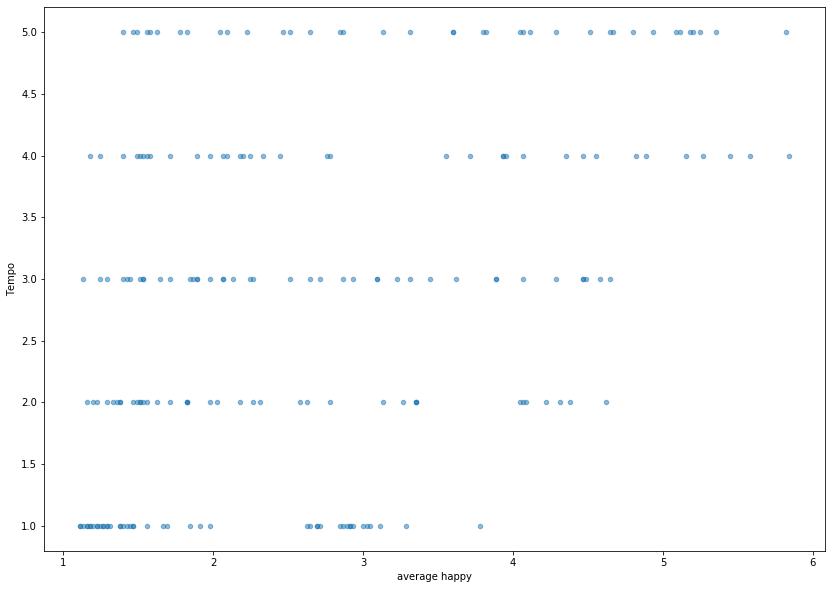

In [57]:
a1 = design_mat.plot.scatter(x="average happy", y= "Tempo", alpha = 0.5,figsize=(14,10))

In [58]:
design_mat.groupby(["Tempo"])["average happy"].sum()

Tempo
1     89.8889
2     93.1113
3    108.3331
4    111.6891
5    130.7332
Name: average happy, dtype: float64

In [59]:
design_mat.groupby(["Tempo"])["average happy"].mean()

Tempo
1    1.954107
2    2.387469
3    2.642271
4    3.102475
5    3.440347
Name: average happy, dtype: float64

In [60]:
design_mat.groupby(["overall_emotion"])["Melody"].count()

overall_emotion
1    68
2    44
3    64
4    24
Name: Melody, dtype: int64